In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [15]:
dataset = pd.read_csv('C:/Users/charl/Downloads/car.data', index_col=0)
dataset.head()

,vhigh.1,2,2.1,small,low,unacc
vhigh,,,,,,
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc


In [16]:
dataset.columns


Index(['vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [17]:

dataset.head()

,vhigh.1,2,2.1,small,low,unacc
vhigh,,,,,,
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc


In [18]:
dataset.columns

Index(['vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [9]:
dataset.isna().sum()

vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

<AxesSubplot:xlabel='unacc', ylabel='count'>

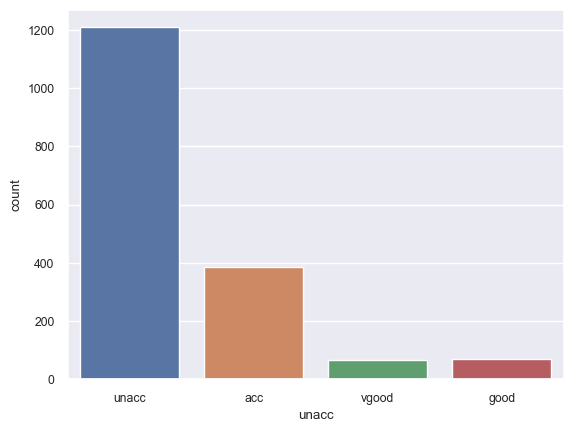

In [21]:
sns.countplot(data=dataset, x='unacc')

In [24]:
df=pd.DataFrame(data=dataset)
dataset.head()

,vhigh.1,2,2.1,small,low,unacc
vhigh,,,,,,
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc


<AxesSubplot:xlabel='vhigh.1', ylabel='count'>

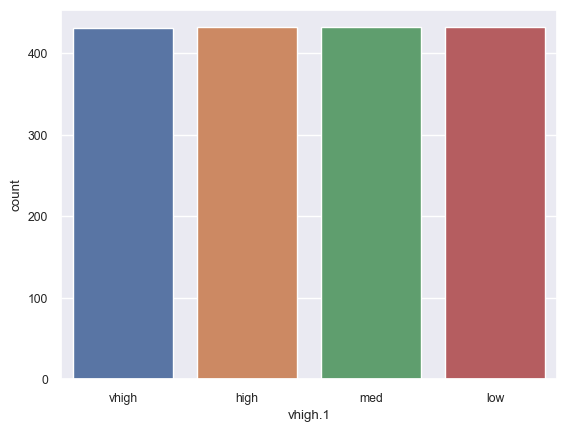

In [28]:
sns.countplot(data=dataset, x='vhigh.1')

<AxesSubplot:xlabel='2.1', ylabel='count'>

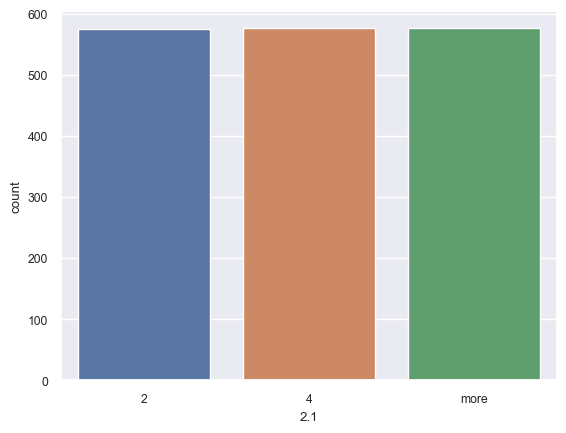

In [29]:
sns.countplot(data=dataset, x='2.1')

<AxesSubplot:xlabel='2', ylabel='count'>

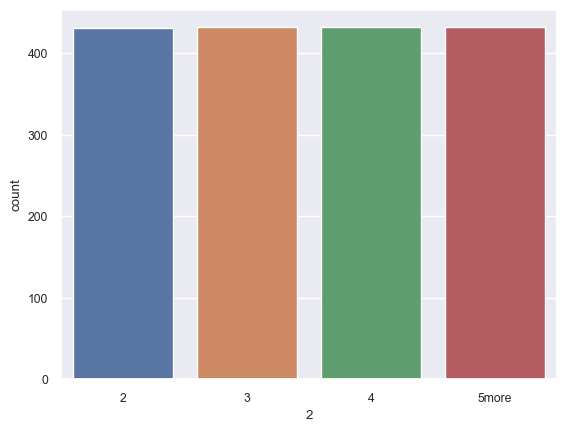

In [30]:
sns.countplot(data=dataset, x='2')

<AxesSubplot:xlabel='small', ylabel='count'>

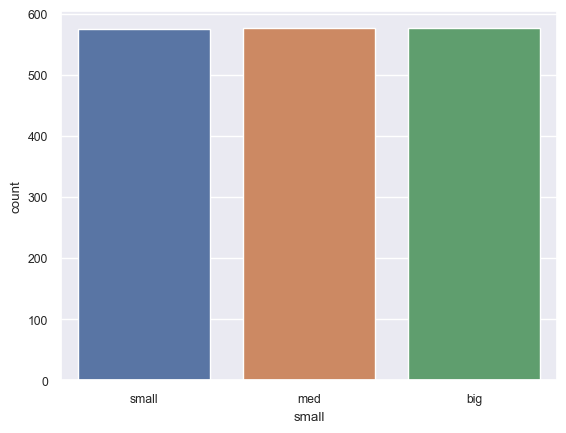

In [31]:
sns.countplot(data=dataset, x='small')

<AxesSubplot:xlabel='low', ylabel='count'>

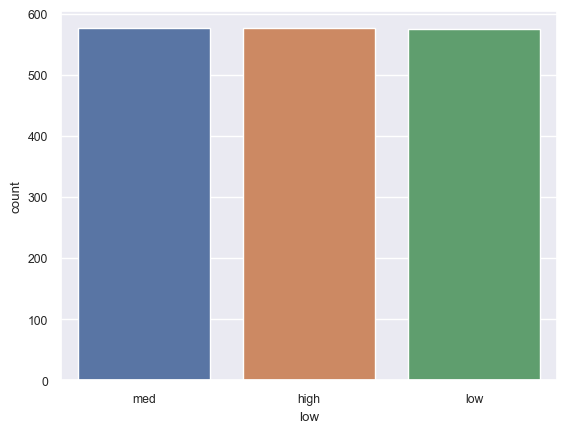

In [32]:
sns.countplot(data=dataset, x='low')

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in dataset:
    dataset[i]=le.fit_transform(dataset[i])

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
X=dataset.drop('unacc',axis=1)
y=dataset.unacc
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
X

,vhigh.1,2,2.1,small,low
vhigh,,,,,
vhigh,3,0,0,2,2
vhigh,3,0,0,2,0
vhigh,3,0,0,1,1
vhigh,3,0,0,1,2
vhigh,3,0,0,1,0
...,...,...,...,...,...
low,1,3,2,1,2
low,1,3,2,1,0
low,1,3,2,0,1


In [45]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7800925925925926
[[ 54   0  42   0]
 [ 18   0   0   0]
 [ 15   0 283   0]
 [ 20   0   0   0]]


In [46]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7384259259259259
[[ 57   5  29   5]
 [ 17   1   0   0]
 [ 37   0 261   0]
 [ 20   0   0   0]]


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7314814814814815
[[ 44   8  34  10]
 [ 14   4   0   0]
 [ 30   0 266   2]
 [ 18   0   0   2]]


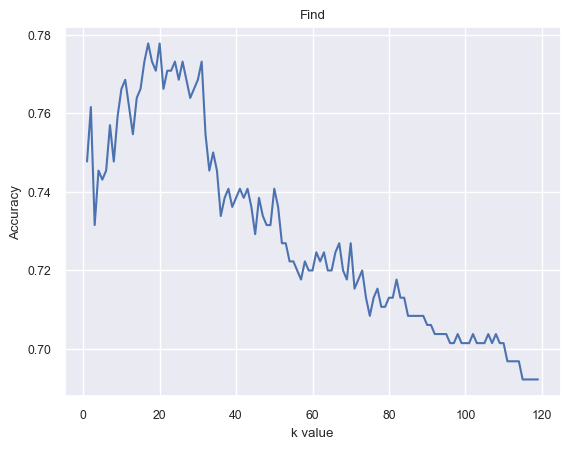

In [48]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 120)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find")
plt.show()